In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob

In [2]:
files = glob.glob('/home/davies/mnt/rds/pbjam/PBjamResults/*bestfit.csv')
print(len(files))

1000


In [3]:
dfs = [pd.read_csv(n) for n in files]

In [4]:
dfs[0].head()

,Unnamed: 0,alpha,bp_rp,d02,dnu,env_height,env_width,eps,mode_width,numax,teff
0,0,0.006460,1.200935,0.746701,7.690223,2.439571,39.804168,1.048680,-0.671333,87.022239,4834.786535
1,1,0.007519,1.300728,0.821911,7.803465,2.469877,44.322053,1.120353,-0.645555,87.805679,4925.008913
2,2,0.016771,1.396563,0.877768,7.852670,2.486284,45.710660,1.286559,-0.620853,94.878813,5035.251895


In [9]:
dnu = [n.dnu[1] for n in dfs]
numax = [n.numax[1] for n in dfs]
alpha = [n.alpha[1] for n in dfs]
d02 = [n.d02[1] for n in dfs]
mode_width = [n.mode_width[1] for n in dfs]
bp_rp = [n.bp_rp[1] for n in dfs]
env_height = [n.env_height[1] for n in dfs]
env_width = [n.env_width[1] for n in dfs]
eps = [n.eps[1] for n in dfs]
teff = [n.teff[1] for n in dfs]

df = pd.DataFrame({'dnu': np.log10(dnu), 
                   'numax': np.log10(numax),
                   'eps': eps,
                   'alpha': np.log10(alpha),
                   'd02': np.log10(d02),
                   'mode_width': np.log10(np.abs(mode_width)),
                   'bp_rp': bp_rp,
                   'env_height': np.log10(env_height),
                   'env_width': np.log10(env_width), 
                   'teff': np.log10(teff)})

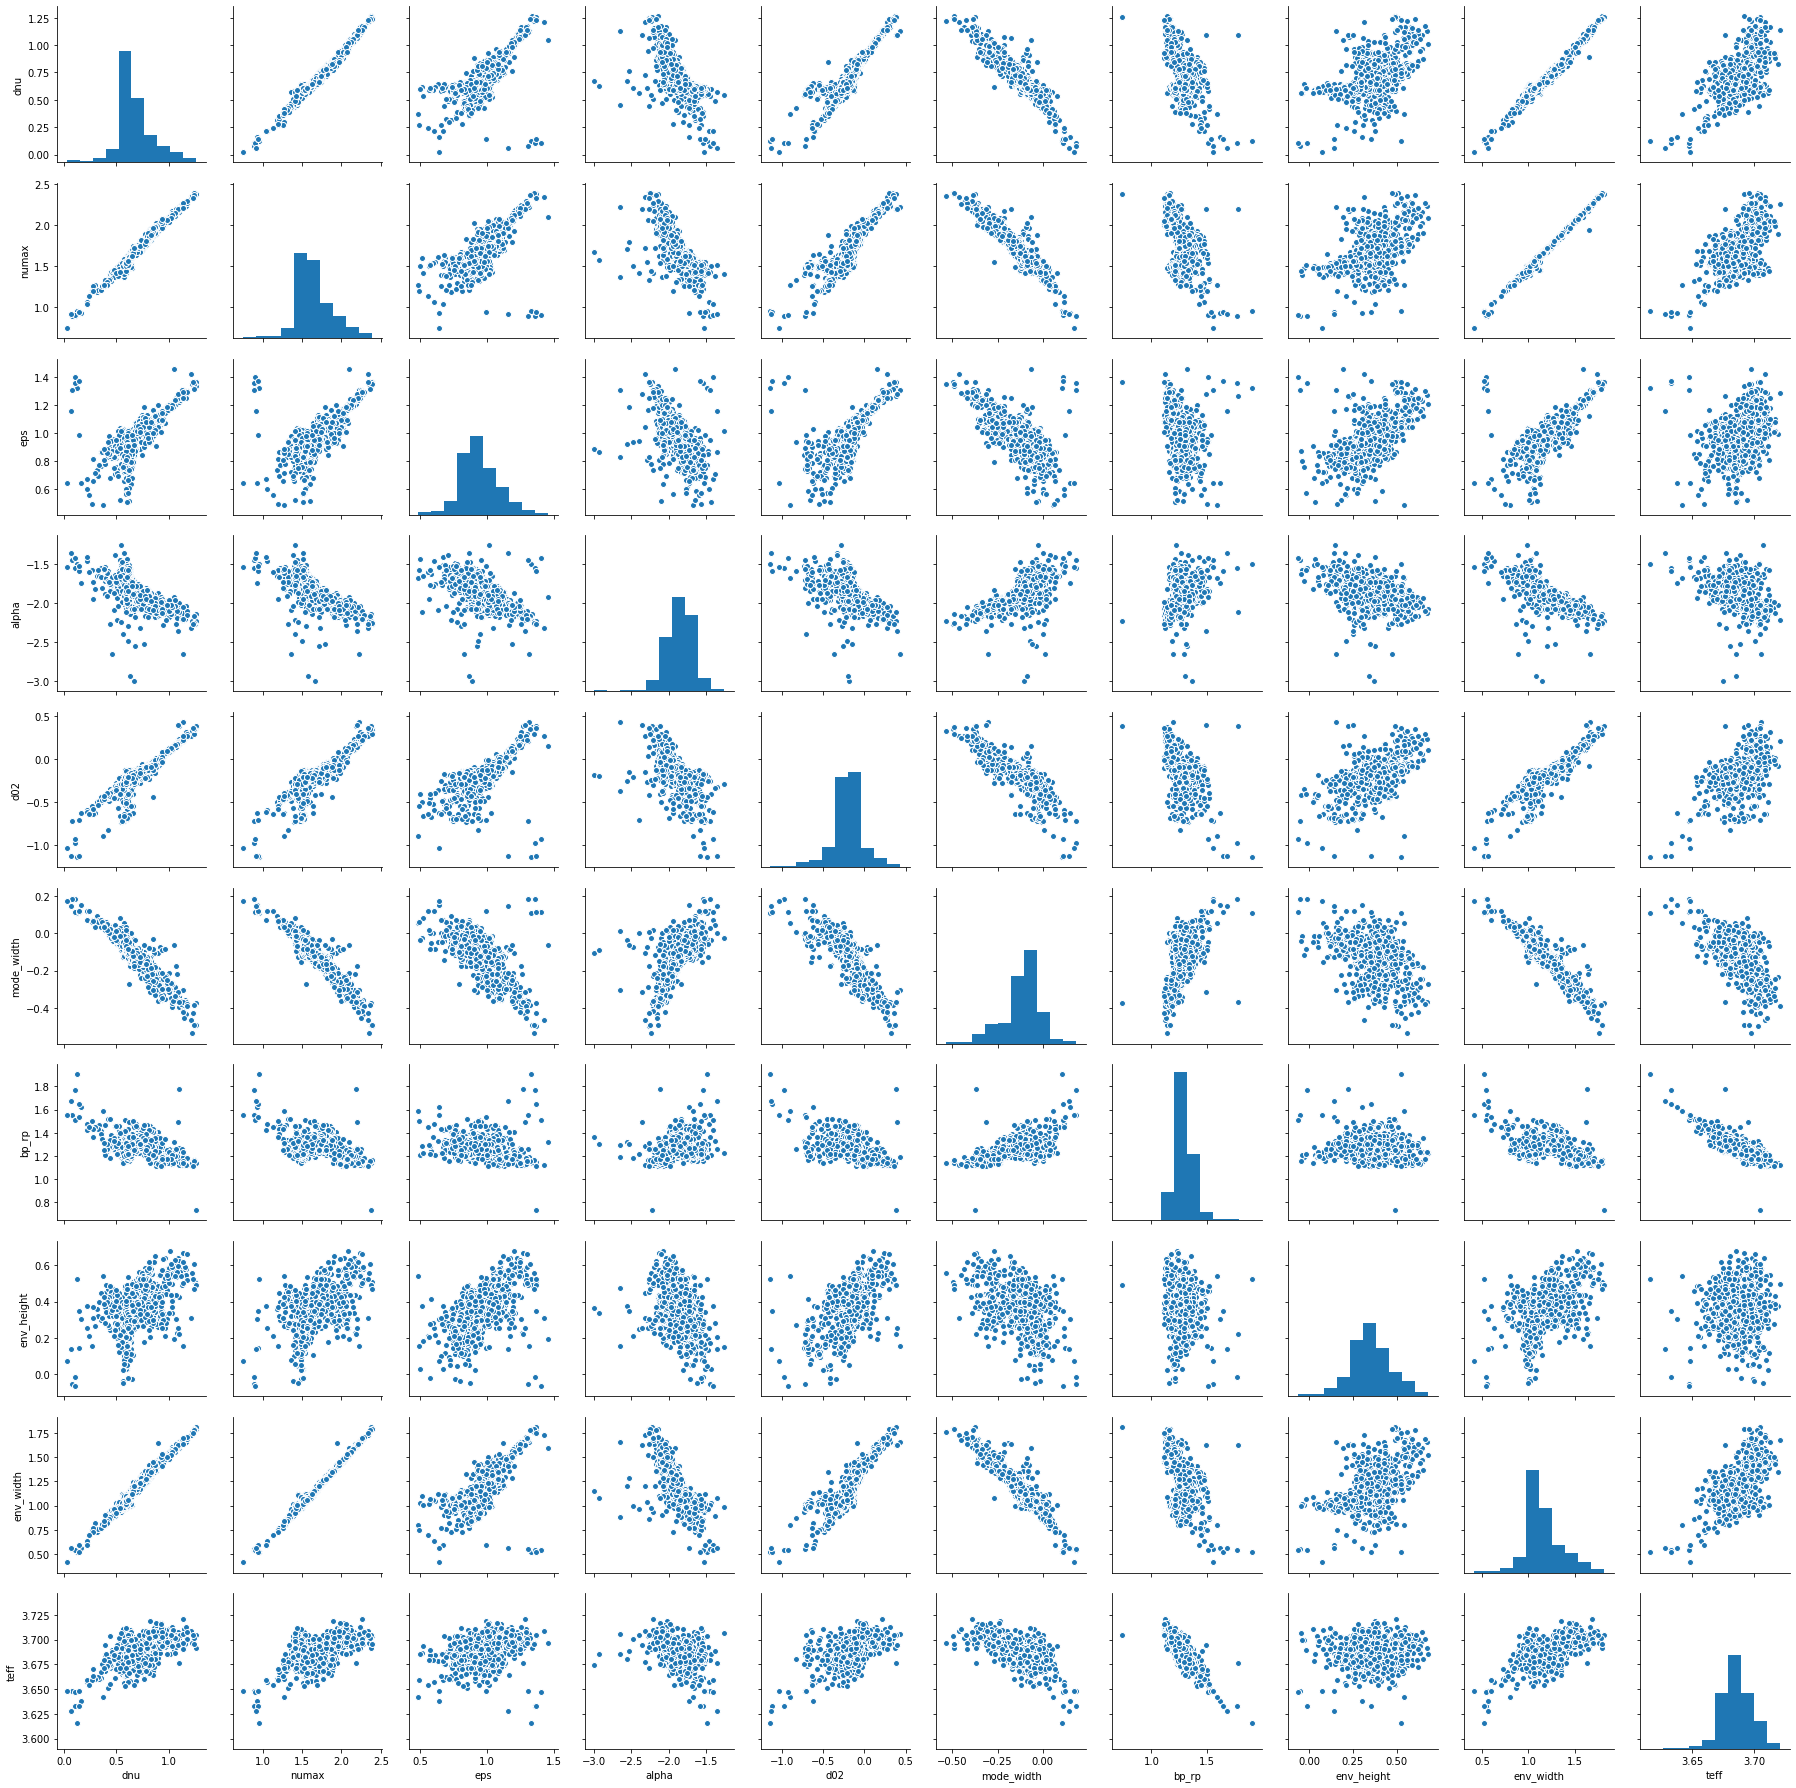

In [6]:
sns.pairplot(df)

In [40]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

cols = ['dnu', 'numax', 'eps', 'bp_rp', 'alpha', 'd02', 'mode_width', 'env_height', 'env_width', 'teff']
X = df[cols].values
clf = IsolationForest(contamination=0.02)
preds = clf.fit(X).predict(X)

clf_ee = EllipticEnvelope(contamination=0.02)
preds_ee = clf_ee.fit(X).predict(X)

df['inpop_IF'] = preds
df['inpop_EE'] = preds_ee

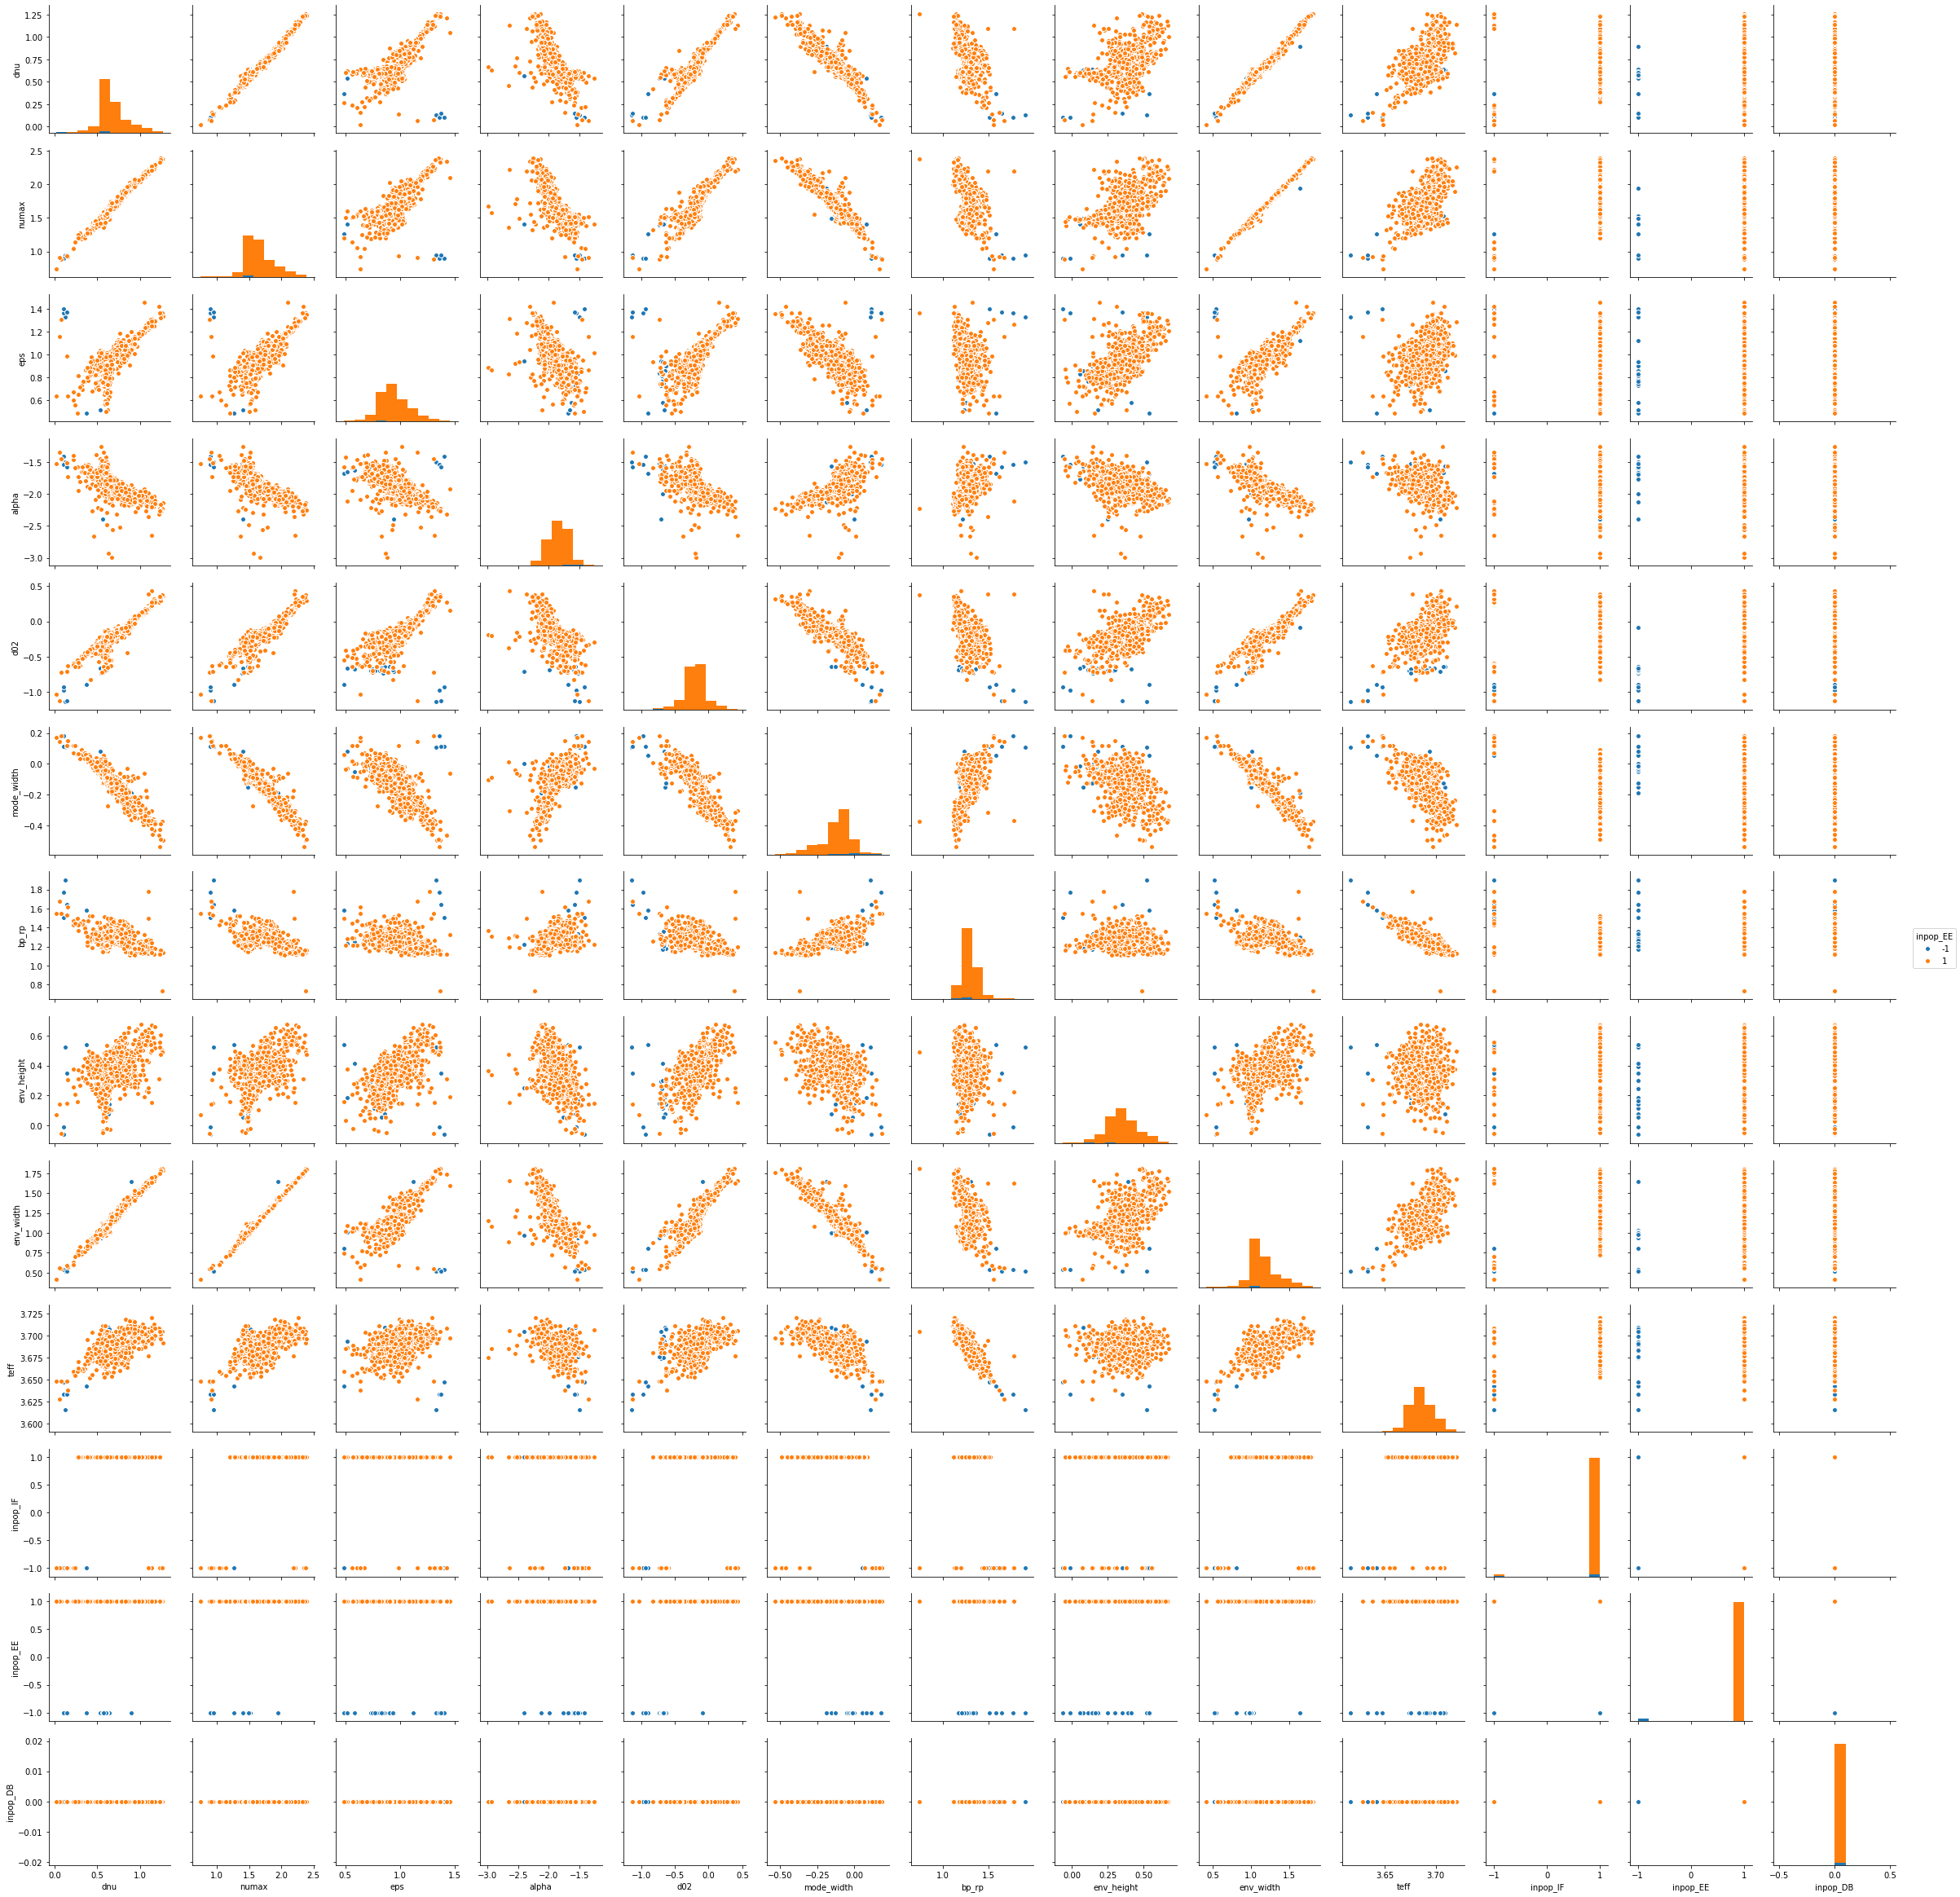

In [41]:
sns.pairplot(df, hue='inpop_EE')